In [1]:
import os 
dir_primary = 'F:/UrbanDataProject/land_surface_temperature/code/analysis'
# os.chdir('/home/tml/research/land_surface_temperature/code/analysis')
os.chdir(dir_primary)
from analysis import *
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
code_dir = os.getcwd()
os.chdir('../..')


# Import data

In [2]:
cities = ['bal', 'por', 'det', 'phx']
# import data
grid_size = 100
df = import_data(grid_size)

# Variable importance

In [3]:
# only run if you need to recalculate the partial dependence
# calculate_partial_dependence(df, grid_size)

In [4]:
# import results
results_pd = pd.read_csv('data/regression/results_partial_dependence_{}.csv'.format(grid_size))

In [5]:
results_pd.head()

,Unnamed: 0,boot,dependent,independent,mean,model,x
0,0,NaN,lst_day_mean,alb_mean,-0.346183,gbrt,-1.545904
1,1,NaN,lst_day_mean,alb_mean,-0.191970,rf,-1.545904
2,2,NaN,lst_day_mean,alb_mean,-1.159293,mars,-1.545904
3,3,NaN,lst_day_mean,alb_mean,1.838466,gam,-1.545904
4,4,NaN,lst_day_mean,alb_mean,1.988205,mlr,-1.545904


In [6]:
# calculate the swing
# calc_swing(results_pd, grid_size)

In [7]:
# import swing results
results_swing = pd.read_csv('data/regression/results_swing_{}.csv'.format(grid_size))

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


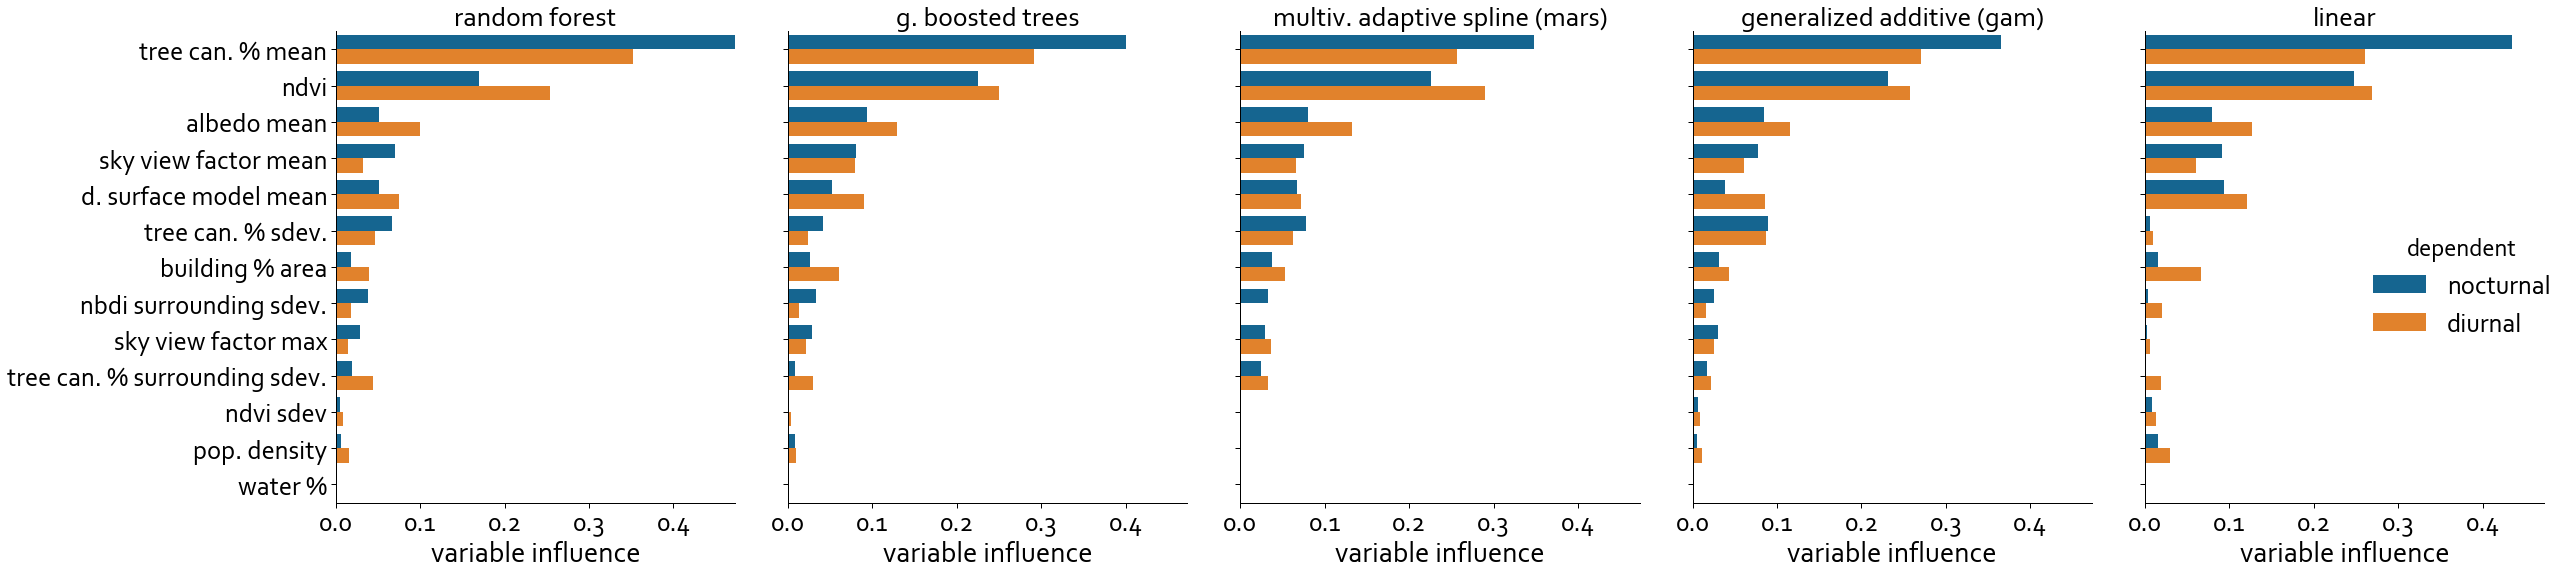

['tree can. % mean',
 'ndvi',
 'albedo mean',
 'sky view factor mean',
 'd. surface model mean',
 'tree can. % sdev.',
 'building % area',
 'nbdi surrounding sdev.',
 'sky view factor max',
 'tree can. % surrounding sdev.',
 'ndvi sdev',
 'pop. density',
 'water %']

<Figure size 432x288 with 0 Axes>

In [8]:
# plot
plot_importance(results_swing, grid_size)

In [9]:
# import the error metrics
path = 'data/regression/holdout_{}'.format(grid_size)                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
loss = pd.concat(df_from_each_file, ignore_index=True)

loss = loss.dropna()
loss_mean = loss.groupby(['error_metric','time_of_day','model']).mean()

loss_mean = loss_mean.reset_index()
loss_mean = loss_mean.replace({'diurnal':'lst_day_mean','diurnalmax':'lst_day_max','nocturnal':'lst_night_mean','nocturnalmax':'lst_night_max', 'gbrf':'gbrt'})
r2_mean = loss_mean.loc[loss_mean.error_metric == 'r2',['time_of_day','model','error']]

In [10]:
# match the mean error to the swing results
swing = pd.merge(left=results_swing, right=r2_mean, how='left', left_on=['dependent','model'], right_on=['time_of_day','model'])

lst_night_mean
['tree can. % mean', 'ndvi', 'albedo mean', 'sky view factor mean', 'd. surface model mean', 'tree can. % sdev.', 'building % area', 'nbdi surrounding sdev.', 'sky view factor max', 'tree can. % surrounding sdev.', 'ndvi sdev', 'pop. density', 'water %']


f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


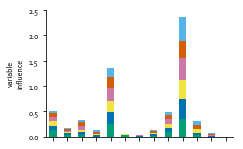

lst_day_mean
['tree can. % mean', 'ndvi', 'albedo mean', 'd. surface model mean', 'sky view factor mean', 'building % area', 'tree can. % sdev.', 'tree can. % surrounding sdev.', 'sky view factor max', 'nbdi surrounding sdev.', 'pop. density', 'ndvi sdev', 'water %']


<Figure size 246.614x152.416 with 0 Axes>

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


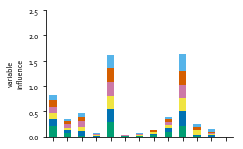

lst_night_max
['tree can. % mean', 'ndvi', 'tree can. % sdev.', 'sky view factor mean', 'albedo mean', 'd. surface model mean', 'building % area', 'sky view factor max', 'nbdi surrounding sdev.', 'tree can. % surrounding sdev.', 'ndvi sdev', 'pop. density', 'water %']


<Figure size 246.614x152.416 with 0 Axes>

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


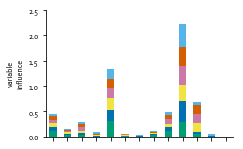

lst_day_max
['ndvi', 'tree can. % mean', 'albedo mean', 'tree can. % sdev.', 'd. surface model mean', 'building % area', 'sky view factor mean', 'tree can. % surrounding sdev.', 'sky view factor max', 'ndvi sdev', 'pop. density', 'nbdi surrounding sdev.', 'water %']


<Figure size 246.614x152.416 with 0 Axes>

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


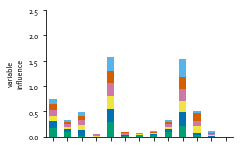

['tree can. % mean',
 'ndvi',
 'albedo mean',
 'sky view factor mean',
 'd. surface model mean',
 'tree can. % sdev.',
 'building % area',
 'nbdi surrounding sdev.',
 'sky view factor max',
 'tree can. % surrounding sdev.',
 'ndvi sdev',
 'pop. density',
 'water %']

<Figure size 246.614x152.416 with 0 Axes>

In [11]:
plot_importance_stacked(swing, grid_size)

In [12]:
swing.head()

,Unnamed: 0,Unnamed: 0.1,dependent,independent,model,raw,swing,time_of_day,error
0,0,0.0,lst_day_max,alb_mean,gam,4.991500,0.112038,lst_day_max,0.815267
1,1,1.0,lst_day_max,bldg,gam,1.831014,0.041098,lst_day_max,0.815267
2,2,2.0,lst_day_max,dsm_mean,gam,3.911023,0.087786,lst_day_max,0.815267
3,3,3.0,lst_day_max,lcov_11,gam,0.000000,0.000000,lst_day_max,0.815267
4,4,4.0,lst_day_max,nbdi_sd_sl,gam,0.830219,0.018635,lst_day_max,0.815267


f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


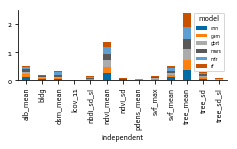

In [13]:
wing = swing.loc[swing.dependent=='lst_night_mean',['independent','swing','model']]
wing.head()
wing = wing.pivot(index= 'independent', columns = 'model', values='swing')
wing.plot(stacked=True, kind='bar')
plt.show()

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


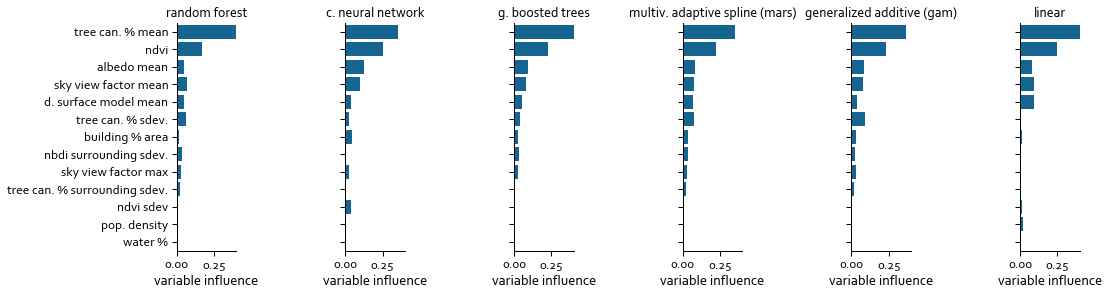

<Figure size 246.614x152.416 with 0 Axes>

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


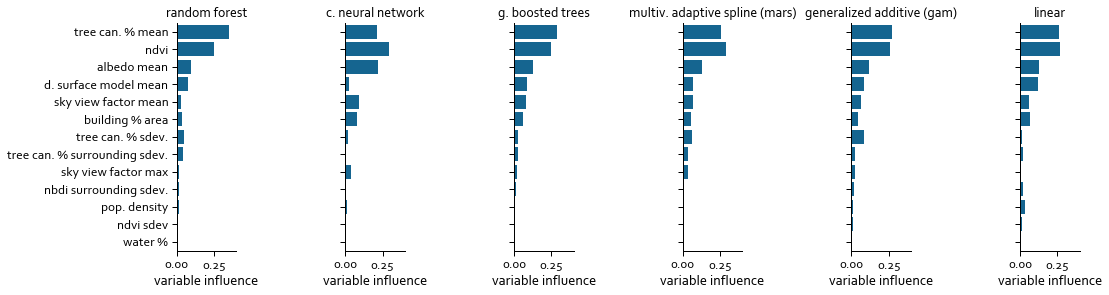

<Figure size 246.614x152.416 with 0 Axes>

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


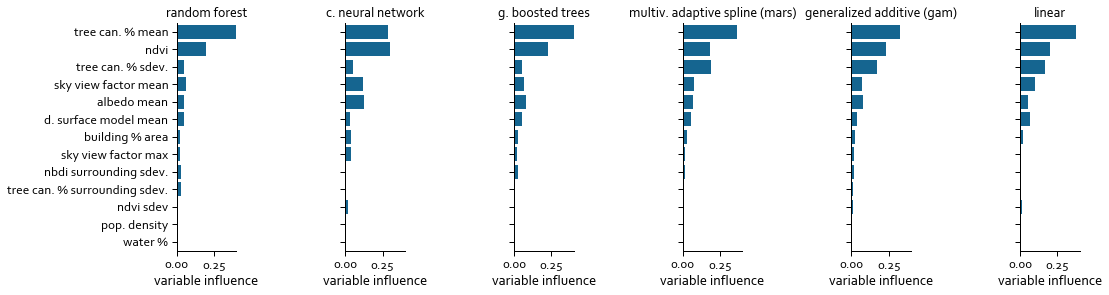

<Figure size 246.614x152.416 with 0 Axes>

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


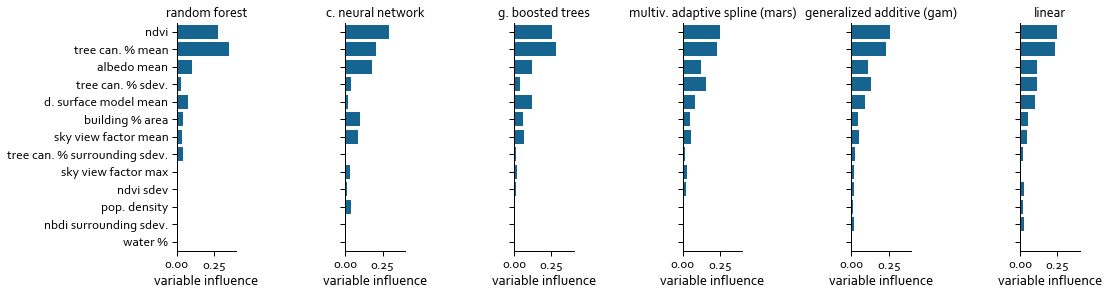

['ndvi',
 'tree can. % mean',
 'albedo mean',
 'tree can. % sdev.',
 'd. surface model mean',
 'building % area',
 'sky view factor mean',
 'tree can. % surrounding sdev.',
 'sky view factor max',
 'ndvi sdev',
 'pop. density',
 'nbdi surrounding sdev.',
 'water %']

<Figure size 246.614x152.416 with 0 Axes>

In [14]:
plot_importance_max(results_swing, grid_size)

In [15]:
results_swing.model.value_counts()

mars    52
rf      52
mlr     52
gam     52
gbrt    52
cnn     40
Name: model, dtype: int64